# Kaggle Diamonds Competition 💎

## 1. Import libraries

In [1]:
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")

## 2. Import data

In [3]:
train = pd.read_csv("../data/train.csv")

In [4]:
test = pd.read_csv("../data/test.csv")

## 3. Explore data

In [5]:
train.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.14,Ideal,G,VVS2,61.0,56.0,6.74,6.76,4.12,9013
1,1,0.76,Ideal,H,VS2,62.7,57.0,5.86,5.82,3.66,2692
2,2,0.84,Ideal,G,VS1,61.4,56.0,6.04,6.15,3.74,4372
3,3,1.55,Ideal,H,VS1,62.0,57.0,7.37,7.43,4.59,13665
4,4,0.30,Ideal,G,SI2,61.9,57.0,4.28,4.31,2.66,422


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 3.4+ MB


In [7]:
train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [8]:
train.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [9]:
train.drop(["id"],axis=1,inplace=True)
test.drop(["id"],axis=1,inplace=True)

## 4.  Categorical Data

In [10]:
train["cut"].unique()

array(['Ideal', 'Fair', 'Very Good', 'Premium', 'Good'], dtype=object)

In [11]:
train["cut"].value_counts()

Ideal        16193
Premium      10301
Very Good     9030
Good          3710
Fair          1221
Name: cut, dtype: int64

In [12]:
train["color"].unique()

array(['G', 'H', 'F', 'J', 'E', 'I', 'D'], dtype=object)

In [13]:
train["color"].value_counts()

G    8459
E    7346
F    7174
H    6273
D    5019
I    4065
J    2119
Name: color, dtype: int64

In [14]:
train["clarity"].unique()

array(['VVS2', 'VS2', 'VS1', 'SI2', 'SI1', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [15]:
train["clarity"].value_counts()

SI1     9746
VS2     9175
SI2     6912
VS1     6137
VVS2    3822
VVS1    2732
IF      1367
I1       564
Name: clarity, dtype: int64

## 4.1.   Column 'Cut'

We convert the values from the column "Cut" from categorical to ordinary using a dictionary. The values are clasified from 1(most expensive cut) to 5(cheapest cut).

In [16]:
dic_for_cut = {
    "Premium": 1,
    "Ideal": 2,
    "Very Good":3,
    "Good": 4,
    "Fair":5
}


In [17]:
train.cut = train.cut.map(dic_for_cut)
test.cut = test.cut.map(dic_for_cut)

## 4.1.   Column 'Color'

We convert the values from the column "Color" from categorical to ordinary using a dictionary. The values are clasified from 1(most expensive color) to 7(cheapest color).

In [18]:
dic_for_color = {"D":1,
                "E":2,
                "F":3,
                "G":4,
                "H":5,
                "I":6,
                "J":7
}

In [19]:
train.color = train.color.map(dic_for_color)
test.color = test.color.map(dic_for_color)

## 4.1.   Column 'Clarity'

We convert the values from the column "Clarity" from categorical to ordinary using a dictionary. The values are clasified from 1(most expensive kind of clarity) to 8(cheapest kind of clarity).

In [20]:
dic_for_clarity = {"VVS2": 3,
                    "VS2": 5,
                    "VS1": 4,
                    "SI2": 7,
                    "SI1": 6,
                    "VVS1": 2,
                    "IF": 1,
                    "I1" : 8
                   }



In [21]:
train.clarity = train.clarity.map(dic_for_clarity)
test.clarity = test.clarity.map(dic_for_clarity)

In [22]:
train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.14,2,4,3,61.0,56.0,6.74,6.76,4.12,9013
1,0.76,2,5,5,62.7,57.0,5.86,5.82,3.66,2692
2,0.84,2,4,4,61.4,56.0,6.04,6.15,3.74,4372
3,1.55,2,5,4,62.0,57.0,7.37,7.43,4.59,13665
4,0.30,2,4,7,61.9,57.0,4.28,4.31,2.66,422


In [23]:
test.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.00,5,7,7,56.3,64.0,6.58,6.54,3.69
1,0.83,1,4,6,62.3,58.0,6.01,5.97,3.73
2,1.00,5,2,7,67.0,53.0,6.19,6.13,4.13
3,1.00,5,5,7,66.5,62.0,6.19,6.10,4.09
4,1.20,3,6,6,62.6,57.0,6.74,6.77,4.23


In [24]:
train.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

## 5. Remove columns that show collinearity

In [25]:
corr = train.corr()

In [26]:
%matplotlib inline

In [27]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")

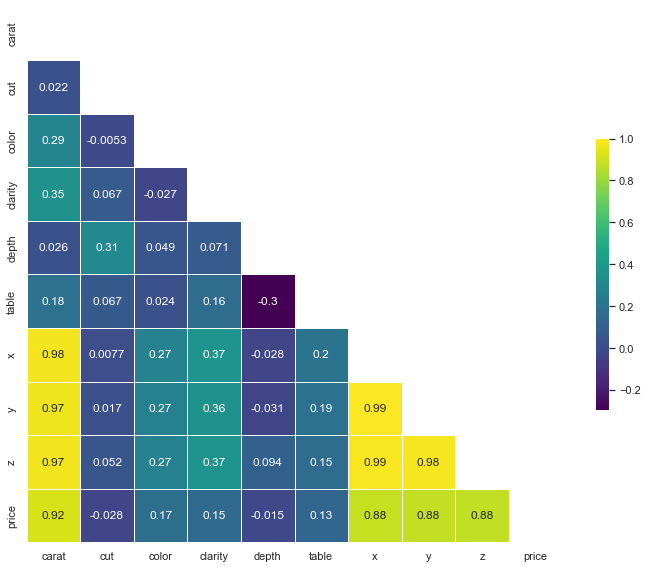

In [28]:
mascara = np.triu(np.ones_like(corr, dtype=bool))
color_map = sns.diverging_palette(0, 10, as_cmap=True)
sns.heatmap(corr,
            mask = mascara,
            cmap='viridis',
            square=True,
            linewidth=0.5,
            vmax=1,
            cbar_kws={"shrink": .5},
            annot=True
);

We drop columns 'x', 'y' and 'z' because the correlation matrix shows collinearity between them.

In [29]:
train.drop(columns=["x", "y", "z"], inplace = True)
test.drop(columns=["x", "y", "z"], inplace = True)

In [30]:
corr = train.corr()

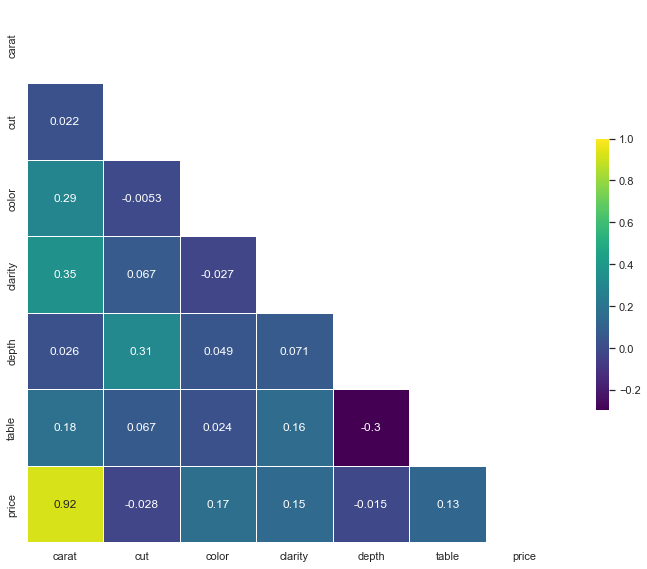

In [31]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) 
color_map = sns.diverging_palette(0, 10, as_cmap=True) 
sns.heatmap(corr,
            mask = mascara,
            cmap='viridis',
            square=True, 
            linewidth=0.5, 
            vmax=1,
            cbar_kws={"shrink": .5},
            annot=True
);

## 6. Final test and train DF

In [32]:
train.head()

,carat,cut,color,clarity,depth,table,price
0,1.14,2,4,3,61.0,56.0,9013
1,0.76,2,5,5,62.7,57.0,2692
2,0.84,2,4,4,61.4,56.0,4372
3,1.55,2,5,4,62.0,57.0,13665
4,0.30,2,4,7,61.9,57.0,422


In [33]:
test.head()

,carat,cut,color,clarity,depth,table
0,1.00,5,7,7,56.3,64.0
1,0.83,1,4,6,62.3,58.0
2,1.00,5,2,7,67.0,53.0
3,1.00,5,5,7,66.5,62.0
4,1.20,3,6,6,62.6,57.0


In [34]:
train.to_csv("../data/train_clean.csv", index=False)

In [35]:
test.to_csv("../data/test_clean.csv", index=False)